In [1]:
# Initialize the app
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('wtam574_iteration4').getOrCreate()

In [2]:
# Loading dataset
df = spark.read.csv('./Mental_Health_Survey.csv', header='true')

# Step 2.1: Initial observation on dataset

In [3]:
#Understanding our data
#Showing specific columns to eliminate the untidiness from showing all columns
df.select("Timestamp", "Age", "Gender", "Country", "state", "self_employed", "family_history", "treatment", "work_interfere").show()
df.select("no_employees", "remote_work", "tech_company", "benefits", "care_options", "wellness_program", "seek_help", "anonymity").show()
df.select("leave", "mental_health_consequence", "phys_health_consequence", "coworkers", "supervisor").show()
df.select("mental_health_interview", "phys_health_interview", "mental_vs_physical", "obs_consequence", "comments").show()

+-------------------+---+------+--------------+-----+-------------+--------------+---------+--------------+
|          Timestamp|Age|Gender|       Country|state|self_employed|family_history|treatment|work_interfere|
+-------------------+---+------+--------------+-----+-------------+--------------+---------+--------------+
|2014-08-27 11:29:31| 37|Female| United States|   IL|           NA|            No|      Yes|         Often|
|2014-08-27 11:29:37| 44|     M| United States|   IN|           NA|            No|       No|        Rarely|
|2014-08-27 11:29:44| 32|  Male|        Canada|   NA|           NA|            No|       No|        Rarely|
|2014-08-27 11:29:46| 31|  Male|United Kingdom|   NA|           NA|           Yes|      Yes|         Often|
|2014-08-27 11:30:22| 31|  Male| United States|   TX|           NA|            No|       No|         Never|
|2014-08-27 11:31:22| 33|  Male| United States|   TN|           NA|           Yes|       No|     Sometimes|
|2014-08-27 11:31:50| 35|Fem

# Step 2.2: Describing data

In [12]:
#Describing data
df.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- self_employed: string (nullable = true)
 |-- family_history: string (nullable = true)
 |-- treatment: string (nullable = true)
 |-- work_interfere: string (nullable = true)
 |-- no_employees: string (nullable = true)
 |-- remote_work: string (nullable = true)
 |-- tech_company: string (nullable = true)
 |-- benefits: string (nullable = true)
 |-- care_options: string (nullable = true)
 |-- wellness_program: string (nullable = true)
 |-- seek_help: string (nullable = true)
 |-- anonymity: string (nullable = true)
 |-- leave: string (nullable = true)
 |-- mental_health_consequence: string (nullable = true)
 |-- phys_health_consequence: string (nullable = true)
 |-- coworkers: string (nullable = true)
 |-- supervisor: string (nullable = true)
 |-- mental_health_interview: string (nullable = t

In [13]:
df.count()

1259

In [14]:
len(df.columns)

27

# Step 2.3: Data exploration

In [15]:
### Count of both null and missing values in pyspark
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+---+------+-------+-----+-------------+--------------+---------+--------------+------------+-----------+------------+--------+------------+----------------+---------+---------+-----+-------------------------+-----------------------+---------+----------+-----------------------+---------------------+------------------+---------------+--------+
|Timestamp|Age|Gender|Country|state|self_employed|family_history|treatment|work_interfere|no_employees|remote_work|tech_company|benefits|care_options|wellness_program|seek_help|anonymity|leave|mental_health_consequence|phys_health_consequence|coworkers|supervisor|mental_health_interview|phys_health_interview|mental_vs_physical|obs_consequence|comments|
+---------+---+------+-------+-----+-------------+--------------+---------+--------------+------------+-----------+------------+--------+------------+----------------+---------+---------+-----+-------------------------+-----------------------+---------+----------+-----------------------+--

In [16]:
#Showing specific columns summary statistics to eliminate the untidiness from showing columns
df.select("Age", "Gender").describe().show()
df.select("Timestamp", "Country", "state", "self_employed", "family_history", "treatment", "work_interfere").describe().show()
df.select("no_employees", "remote_work", "tech_company", "benefits", "care_options", "wellness_program", "seek_help", "anonymity").describe().show()
df.select("leave", "mental_health_consequence", "phys_health_consequence", "coworkers", "supervisor").describe().show()
df.select("mental_health_interview", "phys_health_interview", "mental_vs_physical", "obs_consequence", "comments").describe().show()

+-------+--------------------+------------------+
|summary|                 Age|            Gender|
+-------+--------------------+------------------+
|  count|                1259|              1259|
|   mean| 7.942814831135821E7|              null|
| stddev|2.8182994429819684E9|              null|
|    min|                  -1|A little about you|
|    max|         99999999999|             woman|
+-------+--------------------+------------------+

+-------+-------------------+---------+-----+-------------+--------------+---------+--------------+
|summary|          Timestamp|  Country|state|self_employed|family_history|treatment|work_interfere|
+-------+-------------------+---------+-----+-------------+--------------+---------+--------------+
|  count|               1259|     1259| 1259|         1259|          1259|     1259|          1259|
|   mean|               null|     null| null|         null|          null|     null|          null|
| stddev|               null|     null| null|    

In [2]:
!pip3 install seaborn
!pip3 install --upgrade pip
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pip in ./.local/lib/python3.5/site-packages (20.1.1)


In [3]:
#visualising the 'Age' column in a histogram --> was not able to pyspark here
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot

df2=pd.read_csv('./Mental_Health_Survey.csv')

draw = df2.hist(column='Age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

draw = draw[0]
for x in draw:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set title
    x.set_title("Histogram of Age")

    # Set x-axis label
    x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

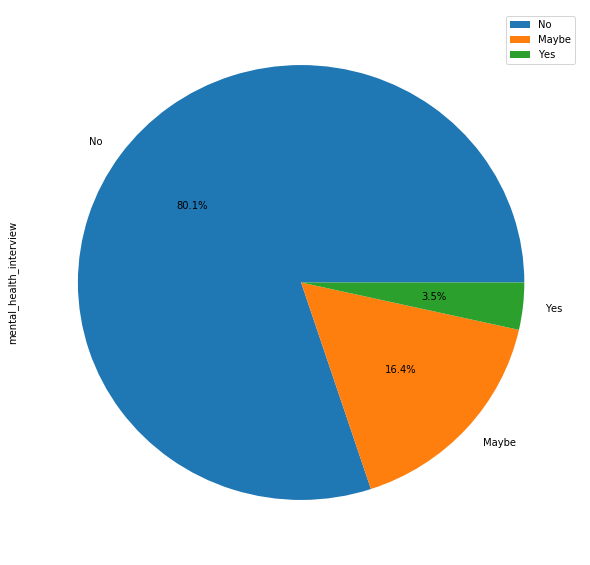

In [19]:
##visualising target variable 'willingness to open up about health issues’ as pie chart --> unable to do with pyspark
df2=pd.read_csv('./Mental_Health_Survey.csv')
type_counts = df2['mental_health_interview'].value_counts()
#creating a new dataframe with one column 'mental_health_interview' to hold the count number of each category
df3 = pd.DataFrame({'mental_health_interview': type_counts}, 
                     index = ['No', 'Maybe', 'Yes']
                   )
df3.plot.pie(y='mental_health_interview', figsize=(10,10), autopct='%1.1f%%')

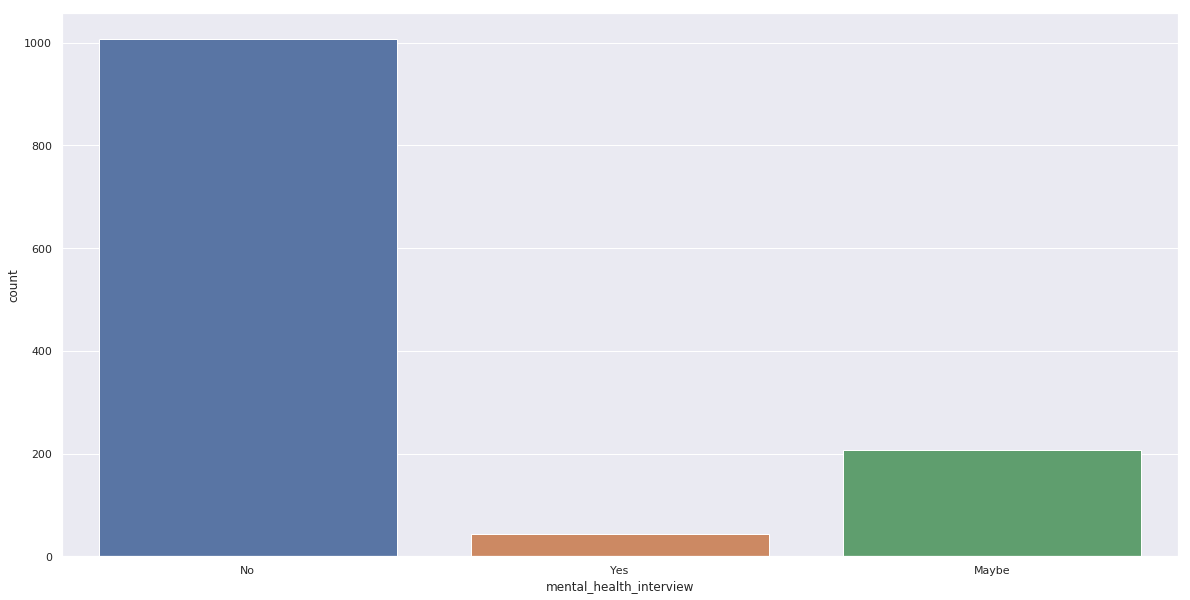

In [20]:
##visualising target variable 'willingness to open up about health issues’ as a bar chart --> could not be done with Pyspark
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='mental_health_interview', data=df2)

In [4]:
##Reclassifying ‘Willingness to open up about health issues’

# First create a string indexer (converting every string into a number).
# A number will be assigned to every category in the column.
from pyspark.ml import Pipeline
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)
label_indexer = StringIndexer(inputCol='mental_health_interview',outputCol='Label')

pipeline = Pipeline(stages=[label_indexer])
pipelineFit = pipeline.fit(df)
df_label = pipelineFit.transform(df)
df_label.select("mental_health_interview","Label").show()

+-----------------------+-----+
|mental_health_interview|Label|
+-----------------------+-----+
|                     No|  0.0|
|                     No|  0.0|
|                    Yes|  2.0|
|                  Maybe|  1.0|
|                    Yes|  2.0|
|                     No|  0.0|
|                     No|  0.0|
|                     No|  0.0|
|                     No|  0.0|
|                  Maybe|  1.0|
|                     No|  0.0|
|                    Yes|  2.0|
|                  Maybe|  1.0|
|                     No|  0.0|
|                  Maybe|  1.0|
|                  Maybe|  1.0|
|                  Maybe|  1.0|
|                     No|  0.0|
|                     No|  0.0|
|                  Maybe|  1.0|
+-----------------------+-----+
only showing top 20 rows



In [58]:
#Failed attempt to explore the most important predictors (features) 
#from pyspark.ml.classification import RandomForestClassifier
#rf = RandomForestClassifier()
#model = rf.fit(df_label)
#print (model.featureImportances)

# Step 2.4: Verifying data quality

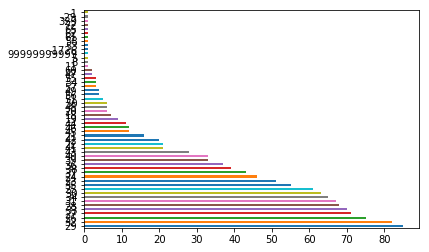

In [5]:
#visualise age against mental_health_interview (target) with scatter plot
import matplotlib.pyplot as plt
df2['Age'].value_counts()[:100].plot(kind='barh')

In [ ]:
#using pandas (python) to show the whole dataset --> checking gender coding consistency
print(df2)

In [ ]:
#finding proportion of gender: how many categories in total
print(df2['Gender'].value_counts())
#bar chart of gender distribution: top 20
df2['Gender'].value_counts()[:20].plot(kind='barh')

# Step 3: Data preparation 
#using python for Step 3 and consequent transformation steps(we will download the clean dataset and upload it for data mining and feature selection)

In [ ]:
#removing variables: Timestamp, State, Comments in our df_label dataset

#Attempt on using pyspark for removing attributes (we use this in our report)
#df_label=df_label.drop("Timestamp", "state", "comments") 
#df_label.show()

df2=df2.drop(['Timestamp', 'state', 'comments'], axis = 1) 

In [ ]:
#checking dataset column amount after removing initial round of variables
df2.info()

In [ ]:
# finding number of missing values (out of range) for each column
#Attempt 1: using pyspark
#df_label=df_label.where("Age<17")
#df_label.show()
#df_label.count()
#df_label=df_label.where("Age>80")
#df_label.select("Age").show()

#Attempt 2: using pyspark
#df_label=df_label.select(df_label.Age.between(17, 80))
#df_label.show()
#df_label.count()

# finding number of missing values (out of range) for each column
num_missing = df2[df2["Age"]>80]
num_missing1 = df2[df2["Age"]<17]

In [ ]:
num_missing

In [ ]:
num_missing1

In [ ]:
#dropping extreme age values by their index position in pandas 
df2 = df2.drop([df2.index[364],df2.index[390],df2.index[715],df2.index[734],
              df2.index[989],df2.index[1090],df2.index[1127]])

In [ ]:
#checking rows and columns after removing extreme values
df2.shape

In [ ]:
#visualising the 'Age' column in a histogram after removing extreme values
draw = df2.hist(column='Age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

draw = draw[0]
for x in draw:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set title
    x.set_title("Histogram of Age (after removing extreme values)")

    # Set x-axis label
    x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

In [ ]:
#replacing extreme age value of -29 with 29
df2.loc[143,'Age'] = 29
rowData = df2.loc[ 143 , : ]
print(rowData)

In [ ]:
#visualising the 'Age' column in a histogram after cleaning and changing -29 to 29
draw = df2.hist(column='Age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

draw = draw[0]
for x in draw:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set title
    x.set_title("Histogram of Age (after replacing -29 with 29)")

    # Set x-axis label
    x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

In [ ]:
#looking at the summary statistics of age after cleaning using python's library
print(df2.describe())

In [ ]:
#finding proportion of gender: how many categories there are in total 
print(df2['Gender'].value_counts())
#bar chart of gender distribution: top 20
df2['Gender'].value_counts()[:20].plot(kind='barh')

In [ ]:
#relabelling 'Gender' into Male, Female, Trans-gender, Other
#Relabeling Male
df2.replace(to_replace =["male", "M","m","Make","Male ","Cis Male","Man","Mail",
                        "Guy (-ish) ^_^","msle","Malr","Cis Man",
                        "ostensibly male, unsure what that really means",
                        "Mal","Male (CIS)","cis male","male leaning androgynous",
                        "Male-ish","something kinda male?","maile"],  
                            value ="Male",inplace=True) 
#Relabeling Female
df2.replace(to_replace =["female", "F","f","Woman","Female ","Cis Female","Femake",
                        "cis-female/femme","femail","Female (cis)","woman"],  
                            value ="Female",inplace=True)
#Relabeling Trans-gender
df2.replace(to_replace =["Female (trans)", "Trans woman","Trans-female","Male ","Cis Male"],  
                            value ="Trans-gender",inplace=True)
#Relabeling Other
df2.replace(to_replace =["Genderqueer", "Agender","queer","non-binary","Enby","queer/she/they",
                        "Neuter","Androgyne","Nah","fluid"],  
                            value ="Other",inplace=True)

In [ ]:
#checking distribution of 'Gender' categories to make sure replace function worked finely
print(df2['Gender'].value_counts())
df2['Gender'].value_counts()[:20].plot(kind='barh')

In [ ]:
#checking consistency with attribute naming/labelling
df2.head(20)

In [ ]:
#renaming attribute/column names for consistency
df2.rename(columns={'self_employed': 'Self_Employed', 'family_history': 'Family_History',
                  'treatment':'Treatment','work_interfere': 'Work_Interfere',
                  'no_employees': 'No_Employees','remote_work':'Remote_Work',
                  'tech_company':'Tech_Company','benefits':'Benefits',
                  'care_options':'Care_Options','wellness_program':'Wellness_Program',
                  'seek_help':'Seek_Help','anonymity':'Anonymity',
                  'leave':'Leave','mental_health_consequence':'Mental_Health_Consequence',
                  'phys_health_consequence':'Phys_Health_Consequence','coworkers':'Coworkers',
                  'supervisor':'Supervisor','mental_health_interview':'Willingness_Mental_Health',
                  'phys_health_interview':'Phys_Health_Interview','mental_vs_physical':'Mental_vs_Physical',
                  'obs_consequence':'Obs_Consequence'}, inplace=True)

In [ ]:
#verifying accurmeasurement type of each variable is correct
df2.dtypes

In [ ]:
##Step 3.3: Constructing a new feature: Age_Tier
bins= [0,31.5,45,58.5]
labels = ['Young','Matured_Young','Middle_Aged']
df2['Age_Tier'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=False)
df2

In [ ]:
#visualising newly constructed feature: age_tier
type_counts = df2['Age_Tier'].value_counts()
#creating a new dataframe with one column 'Age_Tier' to hold the count number of each category
age_df = pd.DataFrame({'Age_Tier': type_counts}, 
                     index = ['Young','Matured_Young','Middle_Aged'])
age_df.plot.pie(y='Age_Tier', figsize=(10,10), autopct='%1.1f%%')

df2.dtypes

In [23]:
#exporting our cleaned df2 dataframe for merging purposes
df2.to_csv("./cleaned_df.csv")

In [24]:
##Step 3.4: Merging two csv data files
df4 = pd.read_csv("./Mental_Health_Survey_a_4.csv")
df5 = pd.read_csv("./Mental_Health_Survey_b_4.csv")
merged_df = df4.merge(df5, on="ID")

In [25]:
#removing variables: ID
merged_df=merged_df.drop(['ID'], axis = 1) 

In [26]:
#checking rows and columns after merging files
merged_df.shape

(1252, 25)

In [27]:
##Step 3.5: Formatting Data - final checks on cleaned data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1251
Data columns (total 25 columns):
Age                          1252 non-null int64
Gender                       1252 non-null object
Country                      1252 non-null object
Self_Employed                1234 non-null object
Family_History               1252 non-null object
Treatment                    1252 non-null object
Work_Interfere               989 non-null object
No_Employees                 1252 non-null object
Remote_Work                  1252 non-null object
Tech_Company                 1252 non-null object
Benefits                     1252 non-null object
Care_Options                 1252 non-null object
Wellness_Program             1252 non-null object
Seek_Help                    1252 non-null object
Anonymity                    1252 non-null object
Leave                        1252 non-null object
Mental_Health_Consequence    1252 non-null object
Phys_Health_Consequence      1252 non-null ob

In [33]:
##issue that occured after merging our datasets: RESOLVED
# Python: replacing NAN values in Age_Tier with Middle_Aged (nan values were found)
merged_df["Age_Tier"].fillna("Middle_Aged", inplace = True)

In [34]:
#check our cleaned dataframe after solving issue for Age_Tier
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1251
Data columns (total 25 columns):
Age                          1252 non-null int64
Gender                       1252 non-null object
Country                      1252 non-null object
Self_Employed                1234 non-null object
Family_History               1252 non-null object
Treatment                    1252 non-null object
Work_Interfere               989 non-null object
No_Employees                 1252 non-null object
Remote_Work                  1252 non-null object
Tech_Company                 1252 non-null object
Benefits                     1252 non-null object
Care_Options                 1252 non-null object
Wellness_Program             1252 non-null object
Seek_Help                    1252 non-null object
Anonymity                    1252 non-null object
Leave                        1252 non-null object
Mental_Health_Consequence    1252 non-null object
Phys_Health_Consequence      1252 non-null ob

# Step 4: Data Transformations - Reduction and Projection

In [35]:
#Download merged_df dataframe as CSV file
merged_df.to_csv("./final_df.csv")

In [4]:
#Import our final cleaned dataset (merged_df) back as a PySpark dataframe
final_df = spark.read.csv('./final_df.csv', header='true')

In [3]:
#Checking our pySpark dataframe
final_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Self_Employed: string (nullable = true)
 |-- Family_History: string (nullable = true)
 |-- Treatment: string (nullable = true)
 |-- Work_Interfere: string (nullable = true)
 |-- No_Employees: string (nullable = true)
 |-- Remote_Work: string (nullable = true)
 |-- Tech_Company: string (nullable = true)
 |-- Benefits: string (nullable = true)
 |-- Care_Options: string (nullable = true)
 |-- Wellness_Program: string (nullable = true)
 |-- Seek_Help: string (nullable = true)
 |-- Anonymity: string (nullable = true)
 |-- Leave: string (nullable = true)
 |-- Mental_Health_Consequence: string (nullable = true)
 |-- Phys_Health_Consequence: string (nullable = true)
 |-- Coworkers: string (nullable = true)
 |-- Supervisor: string (nullable = true)
 |-- Willingness_Mental_Health: string (nullable = true)
 |-- Phys_Health_Interview: string (

In [5]:
#Drop the ID column (_c0) from our final_df dataframe
final_df = final_df.drop("_c0")

In [6]:
##Transforming ‘Willingness_Mental_Health’ label column in our final_df dataframe

# First create a string indexer (converting every string into a number).
# A number will be assigned to every category in the column.
from pyspark.ml import Pipeline
from pyspark.ml.feature import (StringIndexer)
label_indexer = StringIndexer(inputCol='Willingness_Mental_Health',outputCol='label')

pipeline = Pipeline(stages=[label_indexer])
pipelineFit = pipeline.fit(final_df)
final_df = pipelineFit.transform(final_df)
final_df.select("Willingness_Mental_Health","label").show()

+-------------------------+-----+
|Willingness_Mental_Health|label|
+-------------------------+-----+
|                       No|  0.0|
|                       No|  0.0|
|                      Yes|  2.0|
|                    Maybe|  1.0|
|                      Yes|  2.0|
|                       No|  0.0|
|                       No|  0.0|
|                       No|  0.0|
|                       No|  0.0|
|                    Maybe|  1.0|
|                       No|  0.0|
|                      Yes|  2.0|
|                    Maybe|  1.0|
|                       No|  0.0|
|                    Maybe|  1.0|
|                    Maybe|  1.0|
|                    Maybe|  1.0|
|                       No|  0.0|
|                       No|  0.0|
|                    Maybe|  1.0|
+-------------------------+-----+
only showing top 20 rows



In [7]:
final_df.dtypes

[('Age', 'string'),
 ('Gender', 'string'),
 ('Country', 'string'),
 ('Self_Employed', 'string'),
 ('Family_History', 'string'),
 ('Treatment', 'string'),
 ('Work_Interfere', 'string'),
 ('No_Employees', 'string'),
 ('Remote_Work', 'string'),
 ('Tech_Company', 'string'),
 ('Benefits', 'string'),
 ('Care_Options', 'string'),
 ('Wellness_Program', 'string'),
 ('Seek_Help', 'string'),
 ('Anonymity', 'string'),
 ('Leave', 'string'),
 ('Mental_Health_Consequence', 'string'),
 ('Phys_Health_Consequence', 'string'),
 ('Coworkers', 'string'),
 ('Supervisor', 'string'),
 ('Willingness_Mental_Health', 'string'),
 ('Phys_Health_Interview', 'string'),
 ('Mental_vs_Physical', 'string'),
 ('Obs_Consequence', 'string'),
 ('Age_Tier', 'string'),
 ('label', 'double')]

In [67]:
#Using Stringindexer to transform categorical features --> failed attempt at encoding categprical input variables
#indexer = StringIndexer(inputCol="Age", outputCol="AgeIndex")
#final_df = indexer.fit(final_df).transform(final_df)

#indexer1 = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
#final_df = indexer1.fit(final_df).transform(final_df)

#indexer2 = StringIndexer(inputCol="Country", outputCol="CountryIndex")
#final_df = indexer2.fit(final_df).transform(final_df)

#indexer3 = StringIndexer(inputCol="Self_Employed", outputCol="Self_EmployedIndex")
#final_df = indexer3.fit(final_df).transform(final_df)

#indexer4 = StringIndexer(inputCol="Family_History", outputCol="Family_HistoryIndex")
#final_df = indexer4.fit(final_df).transform(final_df)

#indexer5 = StringIndexer(inputCol="Treatment", outputCol="TreatmentIndex")
#final_df = indexer5.fit(final_df).transform(final_df)

#indexer6 = StringIndexer(inputCol="Work_Interfere", outputCol="Work_InterfereIndex")
#final_df = indexer6.fit(final_df).transform(final_df)

#indexer7 = StringIndexer(inputCol="No_Employees", outputCol="No_EmployeesIndex")
#final_df = indexer7.fit(final_df).transform(final_df)

#indexer8 = StringIndexer(inputCol="Remote_Work", outputCol="Remote_WorkIndex")
#final_df = indexer8.fit(final_df).transform(final_df)

#indexer9 = StringIndexer(inputCol="Tech_Company", outputCol="Tech_CompanyIndex")
#final_df = indexer9.fit(final_df).transform(final_df)

#indexer10 = StringIndexer(inputCol="Benefits", outputCol="BenefitsIndex")
#final_df = indexer10.fit(final_df).transform(final_df)

#indexer11 = StringIndexer(inputCol="Care_Options", outputCol="Care_OptionsIndex")
#final_df = indexer11.fit(final_df).transform(final_df)

#indexer12 = StringIndexer(inputCol="Wellness_Program", outputCol="Wellness_ProgramIndex")
#final_df = indexer12.fit(final_df).transform(final_df)

#indexer13 = StringIndexer(inputCol="Seek_Help", outputCol="Seek_HelpIndex")
#final_df = indexer13.fit(final_df).transform(final_df)

#indexer14 = StringIndexer(inputCol="Anonymity", outputCol="AnonymityIndex")
#final_df = indexer14.fit(final_df).transform(final_df)

#indexer15 = StringIndexer(inputCol="Leave", outputCol="LeaveIndex")
#final_df = indexer15.fit(final_df).transform(final_df)

#indexer16 = StringIndexer(inputCol="Mental_Health_Consequence", outputCol="Mental_Health_ConsequenceIndex")
#final_df = indexer16.fit(final_df).transform(final_df)

#indexer17 = StringIndexer(inputCol="Phys_Health_Consequence", outputCol="Phys_Health_ConsequenceIndex")
#final_df = indexer17.fit(final_df).transform(final_df)

#indexer18 = StringIndexer(inputCol="Coworkers", outputCol="CoworkersIndex")
#final_df = indexer18.fit(final_df).transform(final_df)

#indexer19 = StringIndexer(inputCol="Supervisor", outputCol="SupervisorIndex")
#final_df = indexer19.fit(final_df).transform(final_df)

#indexer20 = StringIndexer(inputCol="Phys_Health_Interview", outputCol="Phys_Health_InterviewIndex")
#final_df = indexer20.fit(final_df).transform(final_df)

#indexer21 = StringIndexer(inputCol="Mental_vs_Physical", outputCol="Mental_vs_PhysicalsIndex")
#final_df = indexer21.fit(final_df).transform(final_df)

#indexer22 = StringIndexer(inputCol="Obs_Consequence", outputCol="Obs_ConsequenceIndex")
#final_df = indexer22.fit(final_df).transform(final_df)

#indexer23 = StringIndexer(inputCol="Age_Tier", outputCol="Age_TierIndex")
#final_df = indexer23.fit(final_df).transform(final_df)

In [15]:
## SECOND ATTEMPT: First create a string indexer (convert every string into a number). --> code not used anymore
# A number will be assigned to every category in the column.
#age_indexer = StringIndexer(inputCol="Age", outputCol="AgeIndex")
#age_encoder = OneHotEncoder(inputCol='AgeIndex',outputCol='AgeVec')

#gender_indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
#gender_encoder = OneHotEncoder(inputCol='GenderIndex',outputCol='GenderVec')

#country_indexer = StringIndexer(inputCol="Country", outputCol="CountryIndex")
#country_encoder = OneHotEncoder(inputCol='CountryIndex',outputCol='CountryVec')

#selfemployed_indexer = StringIndexer(inputCol="Self_Employed", outputCol="Self_EmployedIndex")
#selfemployed_encoder = OneHotEncoder(inputCol='Self_EmployedIndex',outputCol='Self_EmployedVec')

#familyhistory_indexer = StringIndexer(inputCol="Family_History", outputCol="Family_HistoryIndex")
#familyhistory_encoder = OneHotEncoder(inputCol='Family_HistoryIndex',outputCol='Family_HistoryVec')

#treatment_indexer = StringIndexer(inputCol="Treatment", outputCol="TreatmentIndex")
#treatment_encoder = OneHotEncoder(inputCol='TreatmentIndex',outputCol='TreatmentVec')

#workinterfere_indexer = StringIndexer(inputCol="Work_Interfere", outputCol="Work_InterfereIndex")
#workinterfere_encoder = OneHotEncoder(inputCol='Work_InterfereIndex',outputCol='Work_InterfereVec')

#noemployees_indexer = StringIndexer(inputCol="No_Employees", outputCol="No_EmployeesIndex")
#noemployees_encoder = OneHotEncoder(inputCol='No_EmployeesIndex',outputCol='No_EmployeesVec')

#remotework_indexer = StringIndexer(inputCol="Remote_Work", outputCol="Remote_WorkIndex")
#remotework_encoder = OneHotEncoder(inputCol='Remote_WorkIndex',outputCol='Remote_WorkVec')

#techcompany_indexer = StringIndexer(inputCol="Tech_Company", outputCol="Tech_CompanyIndex")
#techcompany_encoder = OneHotEncoder(inputCol='Tech_CompanyIndex',outputCol='TechCompany_WorkVec')

#benefits_indexer = StringIndexer(inputCol="Benefits", outputCol="BenefitsIndex")
#benefits_encoder = OneHotEncoder(inputCol='BenefitsIndex',outputCol='BenefitsVec')

#careoptions_indexer = StringIndexer(inputCol="Care_Options", outputCol="Care_OptionsIndex")
#careoptions_encoder = OneHotEncoder(inputCol='Care_OptionsIndex',outputCol='Care_OptionsVec')

#wellness_indexer = StringIndexer(inputCol="Wellness_Program", outputCol="Wellness_ProgramIndex")
#wellness_encoder = OneHotEncoder(inputCol='Wellness_ProgramIndex',outputCol='Wellness_ProgramVec')

#seek_indexer = StringIndexer(inputCol="Seek_Help", outputCol="Seek_HelpIndex")
#seek_encoder = OneHotEncoder(inputCol='Seek_HelpIndex',outputCol='SeekVec')

#anonymity_indexer = StringIndexer(inputCol="Anonymity", outputCol="AnonymityIndex")
#anonymity_encoder = OneHotEncoder(inputCol='AnonymityIndex',outputCol='AnonymityVec')

#leave_indexer = StringIndexer(inputCol="Leave", outputCol="LeaveIndex")
#leave_encoder = OneHotEncoder(inputCol='LeaveIndex',outputCol='LeaveVec')

#mental_health_consequence_indexer = StringIndexer(inputCol="Mental_Health_Consequence", outputCol="Mental_Health_ConsequenceIndex")
#mental_health_consequence_encoder = OneHotEncoder(inputCol='Mental_Health_ConsequenceIndex',outputCol='Mental_Health_ConsequenceIndexVec')

#health_health_consequence_indexer = StringIndexer(inputCol="Phys_Health_Consequence", outputCol="Phys_Health_ConsequenceIndex")
#health_health_consequence_encoder = OneHotEncoder(inputCol='Phys_Health_ConsequenceIndex',outputCol='Phys_Health_ConsequenceVec')

#coworkers_indexer = StringIndexer(inputCol="Coworkers", outputCol="CoworkersIndex")
#coworkers_encoder = OneHotEncoder(inputCol='CoworkersIndex',outputCol='CoworkersVec')

#supervisor_indexer = StringIndexer(inputCol="Supervisor", outputCol="SupervisorIndex")
#supervisor_encoder = OneHotEncoder(inputCol='SupervisorIndex',outputCol='SupervisorVec')

#phys_health_interview_indexer = StringIndexer(inputCol="Phys_Health_Interview", outputCol="Phys_Health_InterviewIndex")
#phys_health_interview_encoder = OneHotEncoder(inputCol='Phys_Health_InterviewIndex',outputCol='Phys_Health_InterviewVec')

#mental_vs_physical_indexer = StringIndexer(inputCol="Mental_vs_Physical", outputCol="Mental_vs_PhysicalsIndex")
#mental_vs_physical_encoder = OneHotEncoder(inputCol='Mental_vs_PhysicalsIndex',outputCol='Mental_vs_PhysicalVec')

#obs_Consequence_indexer = StringIndexer(inputCol="Obs_Consequence", outputCol="Obs_ConsequenceIndex")
#obs_Consequence_encoder = OneHotEncoder(inputCol='Obs_ConsequenceIndex',outputCol='Obs_ConsequenceVec')

#age_tier_indexer = StringIndexer(inputCol="Age_Tier", outputCol="Age_TierIndex")
#age_tier_encoder = OneHotEncoder(inputCol='Age_TierIndex',outputCol='Age_TierVec')

In [16]:
#Now we can assemble all of this as one vector in the features column. (BACK UP) --> code not used anymore
#assembler = VectorAssembler(inputCols=['AgeVec',
# 'GenderVec','CountryVec',
# 'Self_EmployedVec',
# 'Family_HistoryVec',
# 'TreatmentVec',
#'Work_InterfereVec', 'No_EmployeesVec', 'Remote_WorkVec', 'Tech_CompanyVec',
#                                     'BenefitsVec', 'Care_OptionsVec', 'Wellness_ProgramVec',
#                                       'Seek_HelpVec', 'AnonymityVec', 'LeaveVec',
#                                      'Mental_Health_ConsequenceVec','Phys_Health_ConsequenceVec',
#                                      'CoworkersVec','SupervisorVec','Phys_Health_InterviewVec',
#                                      'Mental_vs_PhysicalsVec','Obs_ConsequenceVec',
#                                      'Age_TierVec'],outputCol='features')

In [17]:
#feature selection through RFormula

from pyspark.ml.feature import RFormula

formula = RFormula(
    formula="label ~ Age + Gender + Country + Family_History + Treatment + No_Employees + Remote_Work + Tech_Company + Benefits + Care_Options + Wellness_Program + Seek_Help + Anonymity + Leave + Mental_Health_Consequence +  Phys_Health_Consequence + Coworkers + Supervisor + Phys_Health_Interview + Mental_vs_Physical + Obs_Consequence + Age_Tier",
    featuresCol="features",
    labelCol="label")

output = formula.fit(final_df).transform(final_df)
chisq = output.select("features", "label")
#chisq = output.select("features", "label").show(truncate = False)
chisq.show(truncate = False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                                                  |label|
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|(130,[13,45,47,92,93,94,99,100,101,105,110,112,115,117,119,121,123,126,127,129],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])        |0.0  |
|(130,[25,44,47,92,96,99,102,103,108,109,111,116,117,120,122,124,125,127,129],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])               |0.0  |
|(130,[1,44,49,92,94,99,100,103,105,107,109,114,115,117,121,127,129],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

In [57]:
#FAILED ATTEMPT WITH USING PYSPARK
#Attempt at using ChiSqSelector in Pyspark for feature selection
# one hot encoding and assembling
#from pyspark.ml.classification import  RandomForestClassifier
#from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, VectorSlicer
#from pyspark.ml import Pipeline
##from pyspark.ml.evaluation import BinaryClassificationEvaluator
#from pyspark.ml.linalg import Vectors
#from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

#encoding_var = [i[0] for i in final_df.dtypes if (i[1]=='string') & (i[0]!='Willingness_Mental_Health')]
#num_var = [i[0] for i in final_df.dtypes if ((i[1]=='int') | (i[1]=='double')) & (i[0]!='Willingness_Mental_Health')]

#string_indexes = [StringIndexer(inputCol = c, outputCol = 'IDX_' + c, handleInvalid = 'keep') for c in encoding_var]
#onehot_indexes = [OneHotEncoder(inputCol = ['IDX_' + c], outputCol = ['OHE_' + c]) for c in encoding_var]
#label_indexes = StringIndexer(inputCol = 'Willingness_Mental_Health', outputCol = 'label', handleInvalid = 'keep')
#assembler = VectorAssembler(inputCols = num_var + ['OHE_' + c for c in encoding_var], outputCol = "features")
#rf = RandomForestClassifier(labelCol="label", featuresCol="features", seed = 8464,
#                            numTrees=10, cacheNodeIds = True, subsamplingRate = 0.7)

#pipe = Pipeline(stages = string_indexes + onehot_indexes + [assembler, label_indexes, rf])

#mod = pipe.fit(final_df)

#df2 = mod.transform(final_df)

#mod.stages[-1].featureImportances

In [23]:
!pip3 install sklearn
!pip3 install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.0 MB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 41.4 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=dbae81b55b3f902759d083c9eb320f96b621b5b90825529446e9c2adad8f8f72
  Stored in directory: /home/ubuntu/.cache/pip/wheels/9e/ec/a6/33cdb5605b0b150074213e154792654a1006e6e6807dc7ca6f
Successfully built sklearn
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pip in ./.local/lib/python3.5/site-packages (20.1.1)


In [46]:
#use selectkbest using python's libraries after several failed attempts with using pyspark
selectFeatures_df = pd.read_csv("./final_df.csv")
selectFeatures_df = selectFeatures_df.drop(['Unnamed: 0'], axis = 1)

In [47]:
#converting our target variable into numerical in python
replace_map = {'Willingness_Mental_Health': {'Yes': 0, 'No': 1, 'Maybe': 2}}
selectFeatures_df.replace(replace_map, inplace=True)
selectFeatures_df.head()

,Age,Gender,Country,Self_Employed,Family_History,Treatment,Work_Interfere,No_Employees,Remote_Work,Tech_Company,...,Leave,Mental_Health_Consequence,Phys_Health_Consequence,Coworkers,Supervisor,Willingness_Mental_Health,Phys_Health_Interview,Mental_vs_Physical,Obs_Consequence,Age_Tier
0,37,Female,United States,NaN,No,Yes,Often,Jun-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,1,Maybe,Yes,No,Matured_Young
1,44,Male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,1,No,Don't know,No,Matured_Young
2,32,Male,Canada,NaN,No,No,Rarely,Jun-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,0,Yes,No,No,Matured_Young
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,2,Maybe,No,Yes,Young
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,0,Yes,Don't know,No,Young


In [ ]:
##Step 4.1: Data Reduction through selecting features
#Best Subset Selection using the chi2 test stat for categorical features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

#create a new dataframe for creating the dummy variables to employ selectKBest algorithm
transformDummies = pd.get_dummies(selectFeatures_df, drop_first=True)

#Check data structure and data types of the transformed DataFrame.
print(transformDummies.shape)

#Seperating the dependent and independent variables 
X1 = transformDummies.drop('Willingness_Mental_Health', axis=1) # input categorical features
y1 = transformDummies['Willingness_Mental_Health'] # target variable

#Produce scores and print scores for each categorical features in the data set
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X1, y1)
# print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit.scores_[i]))
    
# visualising the scores
# Get the indices sorted by most important to least important
indices = np.argsort(sf_fit.scores_)[::-1]

# To get your top 15 feature names
features = []
for i in range(15):
    features.append(transformDummies.columns[indices[i]])

# PLot top 15 features
plt.figure(figsize=(35, 3))
plt.bar(features, sf_fit.scores_[indices[range(15)]], color='r', align='center', width=0.3)
plt.show()

In [6]:
#new dataframe with most important features only from feature selection step
finalFinal_df = pd.read_csv("./final_df.csv")
finalFinal_df = finalFinal_df.drop(['Unnamed: 0', 'Benefits', 'Care_Options','Seek_Help',
                                   'Wellness_Program','Country','Tech_Company', 'Age_Tier'], axis = 1)

In [7]:
finalFinal_df.dtypes
finalFinal_df.shape

(1252, 18)

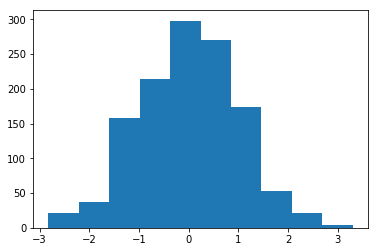

In [8]:
##Step 4.2: Data Projection - statistical transformations
###Demonstrating the use of further statistical transformations on Age (but we do not use it)

from sklearn.preprocessing import PowerTransformer #transforming 'Age'

# Instantiate PowerTransformer
pow_trans = PowerTransformer()
# Train the transform on the data - only for demonstration
pow_trans.fit(finalFinal_df[['Age']])
# Apply the power transform to the data
finalFinal_df['Age'] = pow_trans.transform(finalFinal_df[['Age']])

#visualise the transformation
pyplot.hist(finalFinal_df['Age'])
pyplot.show()

# Step 6: Data Mining Algorithms

In [7]:
#utilising previous final_df dataframe (spark df) to continue with subsequent data mining 
#removing irrelevant features found from feature selection step
final_df = final_df.drop('Benefits', 'Care_Options','Seek_Help',
                                   'Wellness_Program','Country','Tech_Company', 'Age_Tier')
final_df.dtypes

[('Age', 'string'),
 ('Gender', 'string'),
 ('Self_Employed', 'string'),
 ('Family_History', 'string'),
 ('Treatment', 'string'),
 ('Work_Interfere', 'string'),
 ('No_Employees', 'string'),
 ('Remote_Work', 'string'),
 ('Anonymity', 'string'),
 ('Leave', 'string'),
 ('Mental_Health_Consequence', 'string'),
 ('Phys_Health_Consequence', 'string'),
 ('Coworkers', 'string'),
 ('Supervisor', 'string'),
 ('Willingness_Mental_Health', 'string'),
 ('Phys_Health_Interview', 'string'),
 ('Mental_vs_Physical', 'string'),
 ('Obs_Consequence', 'string'),
 ('label', 'double')]

In [8]:
#Further delete irrelevant variables
final_df = final_df.drop("Self_Employed", "Work_Interfere")

In [9]:
#Using Stringindexer to transform categorical features --> failed attempt at encoding categprical input variables

indexer = StringIndexer(inputCol="Age", outputCol="AgeIndex")
final_df = indexer.fit(final_df).transform(final_df)
final_df = final_df.drop("Age")

indexer1 = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
final_df = indexer1.fit(final_df).transform(final_df)
final_df = final_df.drop("Gender")

indexer3 = StringIndexer(inputCol="Family_History", outputCol="Family_HistoryIndex")
final_df = indexer3.fit(final_df).transform(final_df)
final_df = final_df.drop("Family_History")

final_df.show()

+---------+--------------+-----------+----------+------------------+-------------------------+-----------------------+------------+------------+-------------------------+---------------------+------------------+---------------+-----+--------+-----------+-------------------+
|Treatment|  No_Employees|Remote_Work| Anonymity|             Leave|Mental_Health_Consequence|Phys_Health_Consequence|   Coworkers|  Supervisor|Willingness_Mental_Health|Phys_Health_Interview|Mental_vs_Physical|Obs_Consequence|label|AgeIndex|GenderIndex|Family_HistoryIndex|
+---------+--------------+-----------+----------+------------------+-------------------------+-----------------------+------------+------------+-------------------------+---------------------+------------------+---------------+-----+--------+-----------+-------------------+
|      Yes|        Jun-25|         No|       Yes|     Somewhat easy|                       No|                     No|Some of them|         Yes|                       No|     

In [10]:
#Using Stringindexer to transform categorical features 

indexer5 = StringIndexer(inputCol="Treatment", outputCol="TreatmentIndex")
final_df = indexer5.fit(final_df).transform(final_df)
final_df = final_df.drop("Treatment")

indexer7 = StringIndexer(inputCol="No_Employees", outputCol="No_EmployeesIndex")
final_df = indexer7.fit(final_df).transform(final_df)
final_df = final_df.drop("No_Employees")

indexer8 = StringIndexer(inputCol="Remote_Work", outputCol="Remote_WorkIndex")
final_df = indexer8.fit(final_df).transform(final_df)
final_df = final_df.drop("Remote_Work")

final_df.show()

+----------+------------------+-------------------------+-----------------------+------------+------------+-------------------------+---------------------+------------------+---------------+-----+--------+-----------+-------------------+--------------+-----------------+----------------+
| Anonymity|             Leave|Mental_Health_Consequence|Phys_Health_Consequence|   Coworkers|  Supervisor|Willingness_Mental_Health|Phys_Health_Interview|Mental_vs_Physical|Obs_Consequence|label|AgeIndex|GenderIndex|Family_HistoryIndex|TreatmentIndex|No_EmployeesIndex|Remote_WorkIndex|
+----------+------------------+-------------------------+-----------------------+------------+------------+-------------------------+---------------------+------------------+---------------+-----+--------+-----------+-------------------+--------------+-----------------+----------------+
|       Yes|     Somewhat easy|                       No|                     No|Some of them|         Yes|                       No|   

In [11]:
#Using Stringindexer to transform categorical features

indexer14 = StringIndexer(inputCol="Anonymity", outputCol="AnonymityIndex")
final_df = indexer14.fit(final_df).transform(final_df)
final_df = final_df.drop("Anonymity")

indexer15 = StringIndexer(inputCol="Leave", outputCol="LeaveIndex")
final_df = indexer15.fit(final_df).transform(final_df)
final_df = final_df.drop("Leave")

indexer16 = StringIndexer(inputCol="Mental_Health_Consequence", outputCol="Mental_Health_ConsequenceIndex")
final_df = indexer16.fit(final_df).transform(final_df)
final_df = final_df.drop("Mental_Health_Consequence")

final_df.show()

+-----------------------+------------+------------+-------------------------+---------------------+------------------+---------------+-----+--------+-----------+-------------------+--------------+-----------------+----------------+--------------+----------+------------------------------+
|Phys_Health_Consequence|   Coworkers|  Supervisor|Willingness_Mental_Health|Phys_Health_Interview|Mental_vs_Physical|Obs_Consequence|label|AgeIndex|GenderIndex|Family_HistoryIndex|TreatmentIndex|No_EmployeesIndex|Remote_WorkIndex|AnonymityIndex|LeaveIndex|Mental_Health_ConsequenceIndex|
+-----------------------+------------+------------+-------------------------+---------------------+------------------+---------------+-----+--------+-----------+-------------------+--------------+-----------------+----------------+--------------+----------+------------------------------+
|                     No|Some of them|         Yes|                       No|                Maybe|               Yes|             No

In [12]:
#Using Stringindexer to transform categorical features

indexer17 = StringIndexer(inputCol="Phys_Health_Consequence", outputCol="Phys_Health_ConsequenceIndex")
final_df = indexer17.fit(final_df).transform(final_df)
final_df = final_df.drop("Phys_Health_Consequence")

indexer18 = StringIndexer(inputCol="Coworkers", outputCol="CoworkersIndex")
final_df = indexer18.fit(final_df).transform(final_df)
final_df = final_df.drop("Coworkers")

indexer19 = StringIndexer(inputCol="Supervisor", outputCol="SupervisorIndex")
final_df = indexer19.fit(final_df).transform(final_df)
final_df = final_df.drop("Supervisor")

final_df.show()

+-------------------------+---------------------+------------------+---------------+-----+--------+-----------+-------------------+--------------+-----------------+----------------+--------------+----------+------------------------------+----------------------------+--------------+---------------+
|Willingness_Mental_Health|Phys_Health_Interview|Mental_vs_Physical|Obs_Consequence|label|AgeIndex|GenderIndex|Family_HistoryIndex|TreatmentIndex|No_EmployeesIndex|Remote_WorkIndex|AnonymityIndex|LeaveIndex|Mental_Health_ConsequenceIndex|Phys_Health_ConsequenceIndex|CoworkersIndex|SupervisorIndex|
+-------------------------+---------------------+------------------+---------------+-----+--------+-----------+-------------------+--------------+-----------------+----------------+--------------+----------+------------------------------+----------------------------+--------------+---------------+
|                       No|                Maybe|               Yes|             No|  0.0|    13.0|    

In [13]:
#Using Stringindexer to transform categorical features

indexer17 = StringIndexer(inputCol="Phys_Health_Interview", outputCol="Phys_Health_InterviewIndex")
final_df = indexer17.fit(final_df).transform(final_df)
final_df = final_df.drop("Phys_Health_Interview")

indexer18 = StringIndexer(inputCol="Mental_vs_Physical", outputCol="Mental_vs_PhysicalsIndex")
final_df = indexer18.fit(final_df).transform(final_df)
final_df = final_df.drop("Mental_vs_Physical")

indexer19 = StringIndexer(inputCol="Obs_Consequence", outputCol="Obs_ConsequenceIndex")
final_df = indexer19.fit(final_df).transform(final_df)
final_df = final_df.drop("Obs_Consequence")

final_df.show()

+-------------------------+-----+--------+-----------+-------------------+--------------+-----------------+----------------+--------------+----------+------------------------------+----------------------------+--------------+---------------+--------------------------+------------------------+--------------------+
|Willingness_Mental_Health|label|AgeIndex|GenderIndex|Family_HistoryIndex|TreatmentIndex|No_EmployeesIndex|Remote_WorkIndex|AnonymityIndex|LeaveIndex|Mental_Health_ConsequenceIndex|Phys_Health_ConsequenceIndex|CoworkersIndex|SupervisorIndex|Phys_Health_InterviewIndex|Mental_vs_PhysicalsIndex|Obs_ConsequenceIndex|
+-------------------------+-----+--------+-----------+-------------------+--------------+-----------------+----------------+--------------+----------+------------------------------+----------------------------+--------------+---------------+--------------------------+------------------------+--------------------+
|                       No|  0.0|    13.0|        1.0| 

In [15]:
#checking transformed categorical variables
final_df.dtypes

[('Willingness_Mental_Health', 'string'),
 ('label', 'double'),
 ('AgeIndex', 'double'),
 ('GenderIndex', 'double'),
 ('Family_HistoryIndex', 'double'),
 ('TreatmentIndex', 'double'),
 ('No_EmployeesIndex', 'double'),
 ('Remote_WorkIndex', 'double'),
 ('AnonymityIndex', 'double'),
 ('LeaveIndex', 'double'),
 ('Mental_Health_ConsequenceIndex', 'double'),
 ('Phys_Health_ConsequenceIndex', 'double'),
 ('CoworkersIndex', 'double'),
 ('SupervisorIndex', 'double'),
 ('Phys_Health_InterviewIndex', 'double'),
 ('Mental_vs_PhysicalsIndex', 'double'),
 ('Obs_ConsequenceIndex', 'double')]

In [14]:
#6.1.3. Second Data-Mining Objective: Decision Tree Classifier (CART) Algorithm
#Assemble all of this as one vector in the features column
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)
#removing 'AgeIndex' as it has more than 45 values....
assembler = VectorAssembler(inputCols=[
 'GenderIndex',
 'Family_HistoryIndex',
 'TreatmentIndex',
'No_EmployeesIndex', 'Remote_WorkIndex', 'AnonymityIndex', 'LeaveIndex',
                                     'Mental_Health_ConsequenceIndex', 'Phys_Health_ConsequenceIndex', 'CoworkersIndex',
                                       'SupervisorIndex', 'Phys_Health_InterviewIndex', 'Mental_vs_PhysicalsIndex',
                                      'Obs_ConsequenceIndex'],outputCol='features')

In [15]:
# Let's transform our dataframe
output_fixed = assembler.transform(final_df)
output_fixed.show() #this dataframe now contains our features column and label column to be used for data mining

+-------------------------+-----+--------+-----------+-------------------+--------------+-----------------+----------------+--------------+----------+------------------------------+----------------------------+--------------+---------------+--------------------------+------------------------+--------------------+--------------------+
|Willingness_Mental_Health|label|AgeIndex|GenderIndex|Family_HistoryIndex|TreatmentIndex|No_EmployeesIndex|Remote_WorkIndex|AnonymityIndex|LeaveIndex|Mental_Health_ConsequenceIndex|Phys_Health_ConsequenceIndex|CoworkersIndex|SupervisorIndex|Phys_Health_InterviewIndex|Mental_vs_PhysicalsIndex|Obs_ConsequenceIndex|            features|
+-------------------------+-----+--------+-----------+-------------------+--------------+-----------------+----------------+--------------+----------+------------------------------+----------------------------+--------------+---------------+--------------------------+------------------------+--------------------+--------------

# Step 6.3: Build and Select the Models

#Tree Models

In [16]:
# Select the two columns we want. Features (which contains vectors), and the predictor.
final_data = output_fixed.select("features",'label')

In [17]:
# Split the training and testing set (30% held out for testing) - random split 
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [18]:
# Import all the three tree classifiers. 
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [19]:
# Creating the three models: Use defaults to make the comparison "fair"
decision_tree = DecisionTreeClassifier(labelCol='label',featuresCol='features')
random_forest = RandomForestClassifier(labelCol='label',featuresCol='features', numTrees=50)

In [20]:
# Training the models --> expected wait time: near immediate 
decision_tree_model = decision_tree.fit(train_data)
random_forest_model = random_forest.fit(train_data)

In [21]:
#Model comparisons
decision_tree_predictions = decision_tree_model.transform(test_data)
random_forest_predictions = random_forest_model.transform(test_data)

In [22]:
#Evaluation metrics

# Let's import the evaluator.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [23]:
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

In [24]:
#assigning evaluation metric for each model
dtc_acc = acc_evaluator.evaluate(decision_tree_predictions)
rfc_acc = acc_evaluator.evaluate(random_forest_predictions)

In [24]:
#Display the evaluation results
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 74.86%
----------------------------------------
A random forest ensemble has an accuracy of: 80.05%
----------------------------------------


In [25]:
# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
decision_tree_predictions.select('label','prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       2.0|
|  1.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       2.0|
|  0.0|       0.0|
+-----+----------+
only showing top 20 rows



In [26]:
#similar to confusion matrix
totalResults = decision_tree_predictions.select('label','prediction')

correctResults = totalResults.filter(totalResults['label'] == totalResults['prediction'])

countTR = totalResults.count()
print("Correct: " + str(countTR))

countTC = correctResults.count()
print("Total Correct: " + str(countTC))

Correct: 366
Total Correct: 300


In [56]:
#FAILED ATTEMPT------------------------------------

#We can then evaluate using AUC (area under the curve). AUC is linked to ROC.
#AUC = dtc_acc.evaluate(decision_tree_predictions)

#AUC

#import matplotlib.pyplot as plt
#from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Returns as a list (false positive rate, true positive rate)
#preds = decision_tree_predictions.select('label','prediction').rdd.map(lambda row: (float(row['prediction'][1]), float(row['label'])))
#points = CurveMetrics(preds).get_curve('roc')

#plt.figure()
#x_val = [x[0] for x in points]
#y_val = [x[1] for x in points]
#plt.title(title)
#plt.xlabel(xlabel)
#plt.ylabel(ylabel)
#plt.plot(x_val, y_val)

In [55]:
#FAILED ATTEMPT------------------------------------

#visualising our Decision Tree model results

#from spark_tree_plotting import plot_tree
#from spark_tree_plotting import export_graphviz
#from PIL import Image
#import io

#png_string = plot_tree(decision_tree_model,
#                       featureNames=['GenderIndex','Family_HistoryIndex','TreatmentIndex','No_EmployeesIndex'],
#                       categoryNames={},
#                       classNames=labels,
#                       filled=True,
#                       roundedCorners=True,
#                       roundLeaves=True)
                       
#image = Image.open(io.BytesIO(png_string))

# Step 6.3: Building the Random Forest model with parameters

In [25]:
# Select the two columns we want. Features (which contains vectors), and the predictor.
final_data = output_fixed.select("features",'label')

# Split the training and testing set (25% for testing) - random split 
train_data,test_data = final_data.randomSplit([0.8,0.2])

# Import all the three tree classifiers. 
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

# Creating the three models: Use defaults to make the comparison "fair"
random_forest = RandomForestClassifier(labelCol='label',featuresCol='features', numTrees=50, 
                                       maxDepth=4)

# Training the models --> expected wait time: near immediate 
random_forest_model = random_forest.fit(train_data)

#Model comparisons
random_forest_predictions = random_forest_model.transform(test_data)

#Evaluation metrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

#assigning evaluation metric for each model
rfc_acc = acc_evaluator.evaluate(random_forest_predictions)

#Display the evaluation results
print("Here are the results!")
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)

Here are the results!
----------------------------------------
A random forest ensemble has an accuracy of: 77.51%
----------------------------------------


In [41]:
# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
random_forest_predictions.select('label','prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 20 rows



In [26]:
#similar to confusion matrix
totalResults = random_forest_predictions.select('label','prediction')

correctResults = totalResults.filter(totalResults['label'] == totalResults['prediction'])

countTR = totalResults.count()
print("Correct: " + str(countTR))

countTC = correctResults.count()
print("Total Correct: " + str(countTC))

Correct: 249
Total Correct: 193


In [54]:
#Model evaluation - ROC - FAILED ATTEMPT
#from pyspark.mllib.evaluation import BinaryClassificationMetrics

#metrics = BinaryClassificationMetrics(acc_evaluator)
#print("Area under Precision/Recall (PR) curve: %.f" % (metrics.areaUnderPR * 100))
#print("Area under Receiver Operating Characteristic (ROC) curve: %.3f" % (metrics.areaUnderROC * 100))

# Step 7.2: Running the model!!!!

In [60]:
#NOTE: output_fixed.show() contains our transformed variables and features column
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select the two columns we want. Features (which contains vectors), and the predictor.
final_data = output_fixed.select("features",'label')

# Split the training and testing set (20% for testing) - random split 
train_data,test_data = final_data.randomSplit([0.8,0.2])

# Import all the three tree classifiers. 
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

# Creating the three models: Use defaults to make the comparison "fair"
random_forest = RandomForestClassifier(labelCol='label',featuresCol='features', numTrees=50, 
                                       maxDepth=4)

# Training the models --> expected wait time: near immediate 
random_forest_model = random_forest.fit(train_data)

#Model comparisons
random_forest_predictions = random_forest_model.transform(test_data)

#Evaluation metrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

#assigning evaluation metric for each model
rfc_acc = acc_evaluator.evaluate(random_forest_predictions)

#Display the evaluation results
print("Here are the results!")
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)

Here are the results!
----------------------------------------
A random forest ensemble has an accuracy of: 79.69%
----------------------------------------


In [43]:
#evaluate our model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(random_forest_predictions, 
                                                       {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8490196078431365


In [28]:
#Correct Predictions made
totalResults = random_forest_predictions.select('label','prediction')

correctResults = totalResults.filter(totalResults['label'] == totalResults['prediction'])

countTR = totalResults.count()
print("Correct: " + str(countTR))

countTC = correctResults.count()
print("Total Correct: " + str(countTC))

Correct: 279
Total Correct: 228


In [29]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix

y_true = random_forest_predictions.select(['label']).collect()
y_pred = random_forest_predictions.select(['prediction']).collect()

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       229
         1.0       0.36      0.12      0.18        41
         2.0       0.00      0.00      0.00         9

    accuracy                           0.82       279
   macro avg       0.40      0.37      0.36       279
weighted avg       0.74      0.82      0.77       279



/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#Extracting tree rules from our model
print(random_forest_model.toDebugString)

RandomForestClassificationModel (uid=rfc_2224e25fd275) with 50 trees
  Tree 0 (weight 1.0):
    If (feature 10 in {0.0})
     If (feature 12 in {1.0})
      If (feature 3 in {3.0,5.0})
       If (feature 7 in {0.0})
        Predict: 0.0
       Else (feature 7 not in {0.0})
        Predict: 0.0
      Else (feature 3 not in {3.0,5.0})
       If (feature 11 in {1.0})
        Predict: 0.0
       Else (feature 11 not in {1.0})
        Predict: 1.0
     Else (feature 12 not in {1.0})
      If (feature 6 in {0.0,1.0,2.0,3.0})
       If (feature 11 in {1.0})
        Predict: 0.0
       Else (feature 11 not in {1.0})
        Predict: 0.0
      Else (feature 6 not in {0.0,1.0,2.0,3.0})
       If (feature 11 in {0.0,1.0})
        Predict: 0.0
       Else (feature 11 not in {0.0,1.0})
        Predict: 2.0
    Else (feature 10 not in {0.0})
     If (feature 11 in {1.0})
      If (feature 2 in {0.0})
       If (feature 4 in {0.0})
        Predict: 0.0
       Else (feature 4 not in {0.0})
        Pre

In [53]:
#Visualising decision tree --> failed attempt

#!pip install pydotplus
#import pydotplus 
#from sklearn.tree import export_graphviz
#from IPython.display import Image 
#from sklearn.externals.six import StringIO 
#from sklearn import tree

#array holding class labels
#cn=['Yes', 'No', 'Maybe']
#fn=['AgeIndex', 'GenderIndex', 'Gender_Male','Family_HistoryIndex', 'Family_HistoryIndex',
#    'TreatmentIndex', 'No_EmployeesIndex', 'Remote_WorkIndex','AnonymityIndex',
#    'LeaveIndex','Mental_Health_ConsequenceIndex', 'Phys_Health_ConsequenceIndex',
#    'CoworkersIndex','SupervisorIndex','Phys_Health_InterviewIndex','Mental_vs_PhysicalsIndex',
#    'Obs_ConsequenceIndex']

#dot_data = StringIO()
#dot_string = export_graphviz(random_forest_model, 
#                class_names=cn,
#                feature_names = fn, 
#                filled=True, rounded=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png()

# 8.5: Iterations

In [38]:
#NOTE: output_fixed.show() contains our transformed variables and features column
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select the two columns we want. Features (which contains vectors), and the predictor.
final_data = output_fixed.select("features",'label')

# Split the training and testing set (20% for testing) - random split 
train_data,test_data = final_data.randomSplit([0.8,0.2])

# Import all the three tree classifiers. 
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

# Creating the three models: Use defaults to make the comparison "fair"
random_forest = RandomForestClassifier(labelCol='label',featuresCol='features', numTrees=50, 
                                       maxDepth=3)

# Training the models --> expected wait time: near immediate 
random_forest_model = random_forest.fit(train_data)

#Model comparisons
random_forest_predictions = random_forest_model.transform(test_data)

#Evaluation metrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

#assigning evaluation metric for each model
rfc_acc = acc_evaluator.evaluate(random_forest_predictions)

#Display the evaluation results
print("Here are the results!")
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)

Here are the results!
----------------------------------------
A random forest ensemble has an accuracy of: 84.50%
----------------------------------------
